## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jasonchang0/kaggle-google-apps/master/google-play-store-apps/googleplaystore.csv')
df.head()   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# Checking for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Insights

The dataset has some missing values

## Data Cleaning

In [7]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [8]:
df['Reviews'].str.isnumeric().sum()

10840

In [9]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy = df.copy()

In [11]:
df_copy = df_copy.drop(df_copy.index[10472])

In [12]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
# conver Reviews datatype to int
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [15]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
df_copy['Size'] = df_copy['Size'].str.replace('M','000')
df_copy['Size'] = df_copy['Size'].str.replace('k','')
df_copy['Size'] = df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)

In [17]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [18]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [20]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs', 'Price']

for item in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] =  df_copy[col].str.replace(item, '')

In [22]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [23]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [24]:
df_copy['Price'] = df_copy['Price'].astype(float)
df_copy['Installs'] = df_copy['Installs'].astype(int)

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [26]:
# Handling last updated feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [27]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [28]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [30]:
df_copy.to_csv("data/google_cleaned.csv")

## EDA - Exploratory Data Analysis

In [31]:
df2 = df_copy.copy()
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [32]:
df2[df2.duplicated('App')].shape

(1181, 16)

## Observation

The dataset has 1181 duplicate records

In [33]:
df2 = df2.drop_duplicates(subset=['App'], keep='first')

In [34]:
df2.shape

(9659, 16)

## Explore Data

In [35]:
numeric_features = [feature for feature in df2.columns if df2[feature].dtype !='O']
categorical_features = [feature for feature in df2.columns if df2[feature].dtype =='O']

In [36]:
# print columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))     

We have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [37]:
## Proportion of count data on categorical columns

for col in categorical_features:
    print(df2[col].value_counts(normalize=True)*100)
    print("----------------------------------------------")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE    

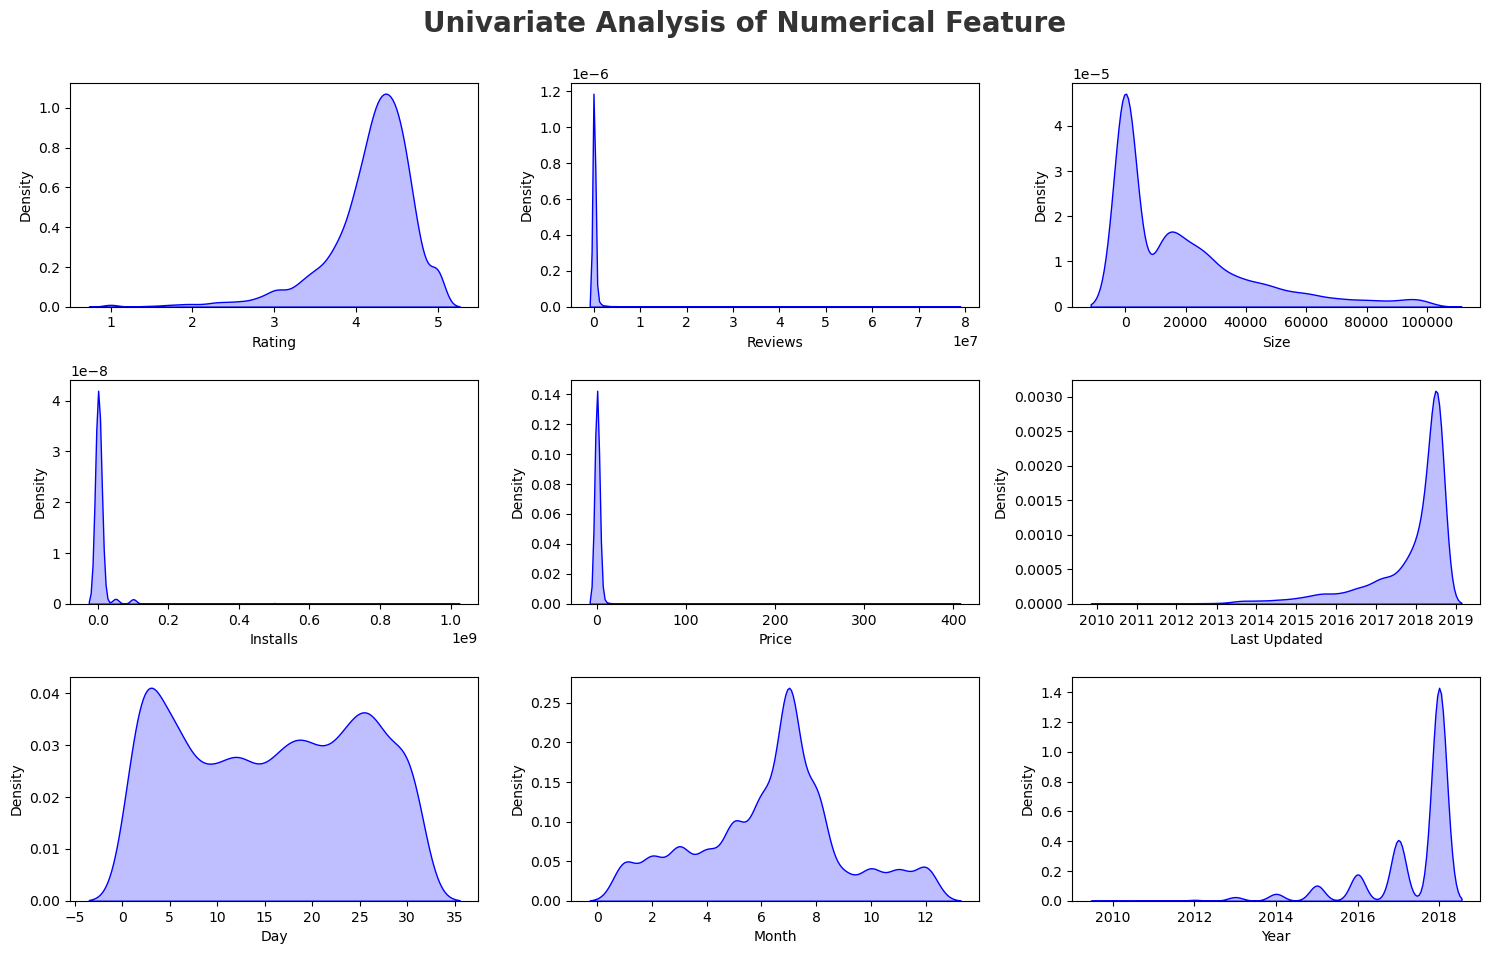

In [38]:
## Proportion of count data on numeric columns
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df2[numeric_features[i]], shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Obsevations
- Rating and Year is left skewed while Reviews, Size, Installs, and Price are right skewed

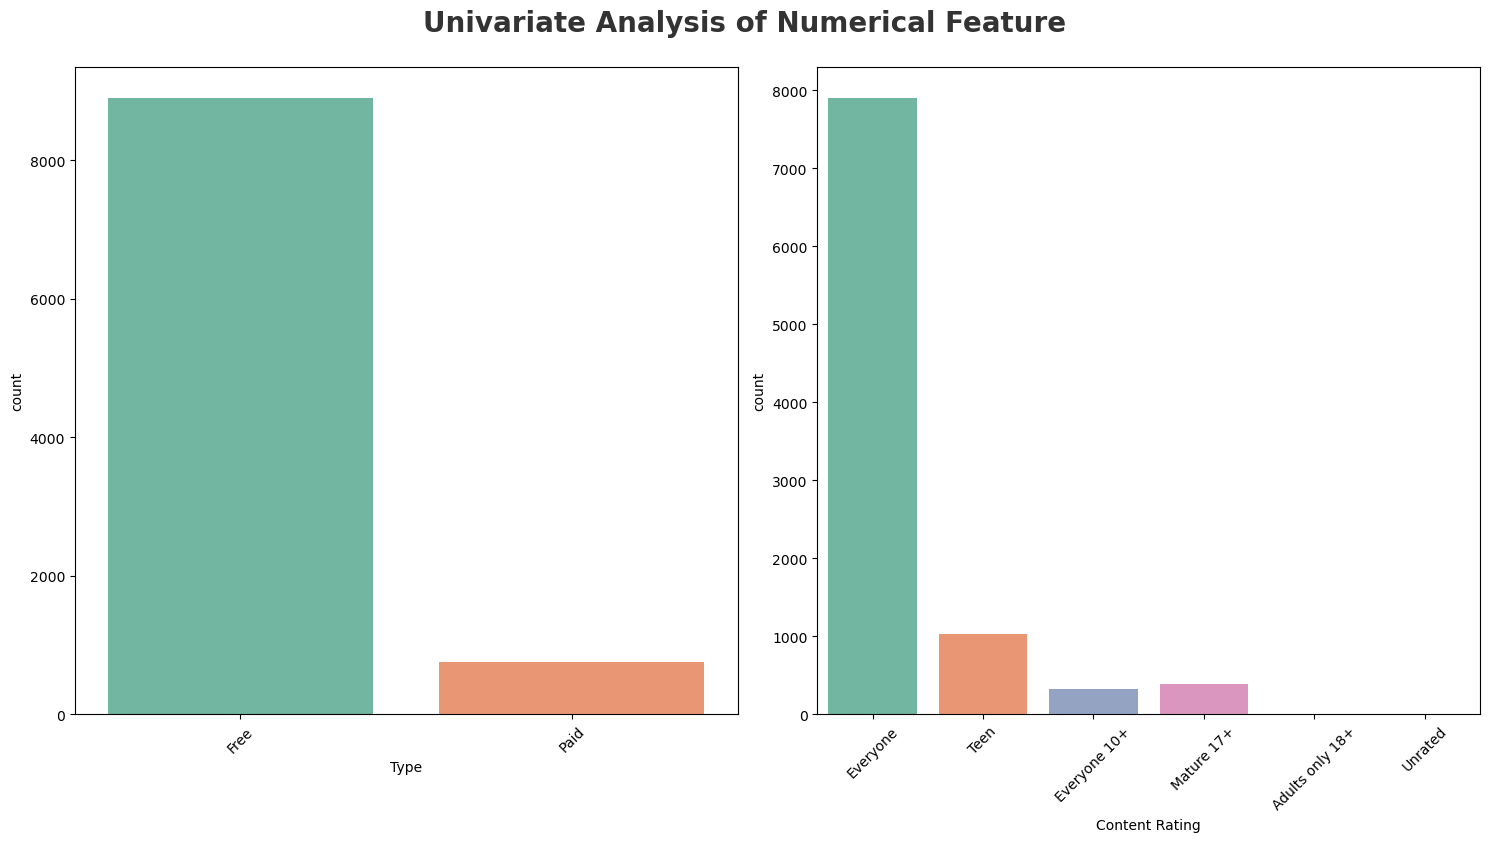

In [39]:
## Categorical columns
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature", fontsize=20, fontweight='bold', alpha=0.8, y=1)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df2[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Observation
- 

## Which is the most popular category

In [40]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [41]:
# Top 10 App Category
category = pd.DataFrame(df2['Category'].value_counts())
category = category.rename(columns={'count':'Count'})
category

,Count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


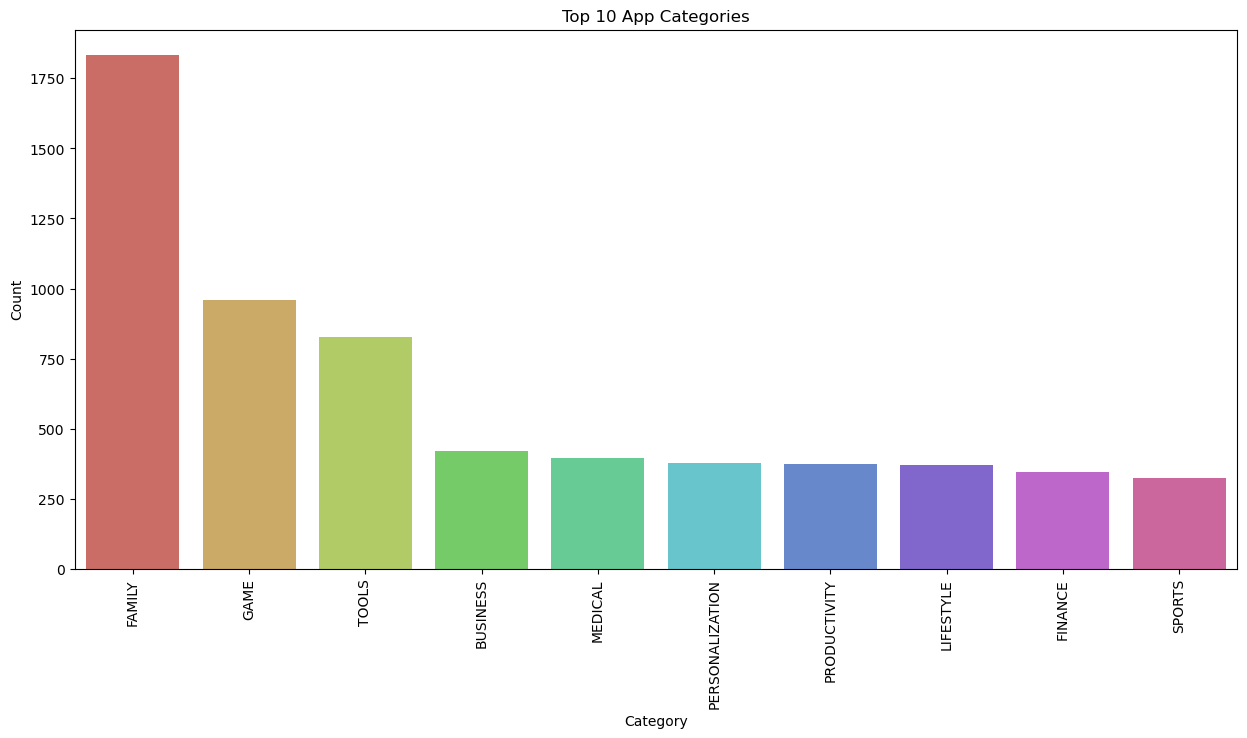

In [42]:
# top 10 Apps
plt.figure(figsize=(15,7))
sns.barplot(x=category.index[:10], y='Count', data=category[:10], palette='hls')
plt.title("Top 10 App Categories")
plt.xticks(rotation=90)
plt.show();

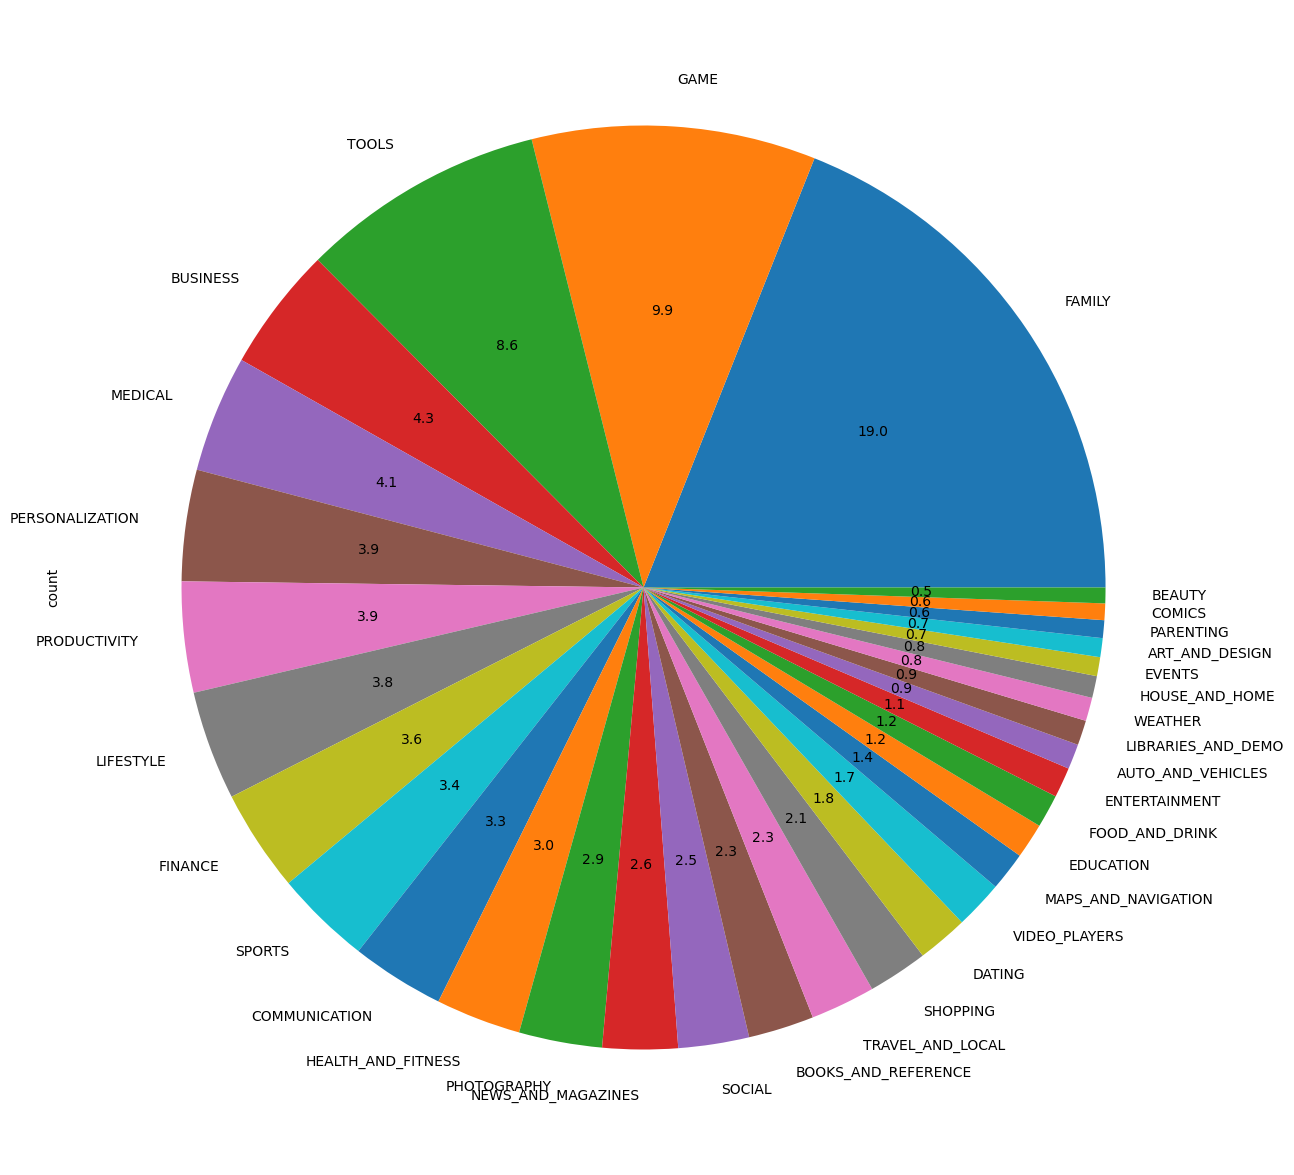

In [43]:
df2['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15,15),autopct='%1.1f');

## Observations

1. The top 10 apps categories are: FAMILY, GAME, TOOLS, BUSINESS, MEDICAL, PERSONALIZATION, PRODUCTIVITY, LIFESTYLE, FINANCE, and SPORTS
2. Family category has the most number of apps with 19.0%, follow by Game 9.9%, and Tools 8.6%.
2. Beauty, comics, and parenting apps category are the bottom 3 app categories in playstore with 0.5%, 0.6%, and 0.6% respectively

## Top 10 Apps Categories By The Number Of Installations

In [45]:
cat_installs = df2.groupby(by=['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
cat_installs.Installs = cat_installs.Installs/1000000000 #converting into billions
top_10_cat_installs = cat_installs.head(10)
top_10_cat_installs

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


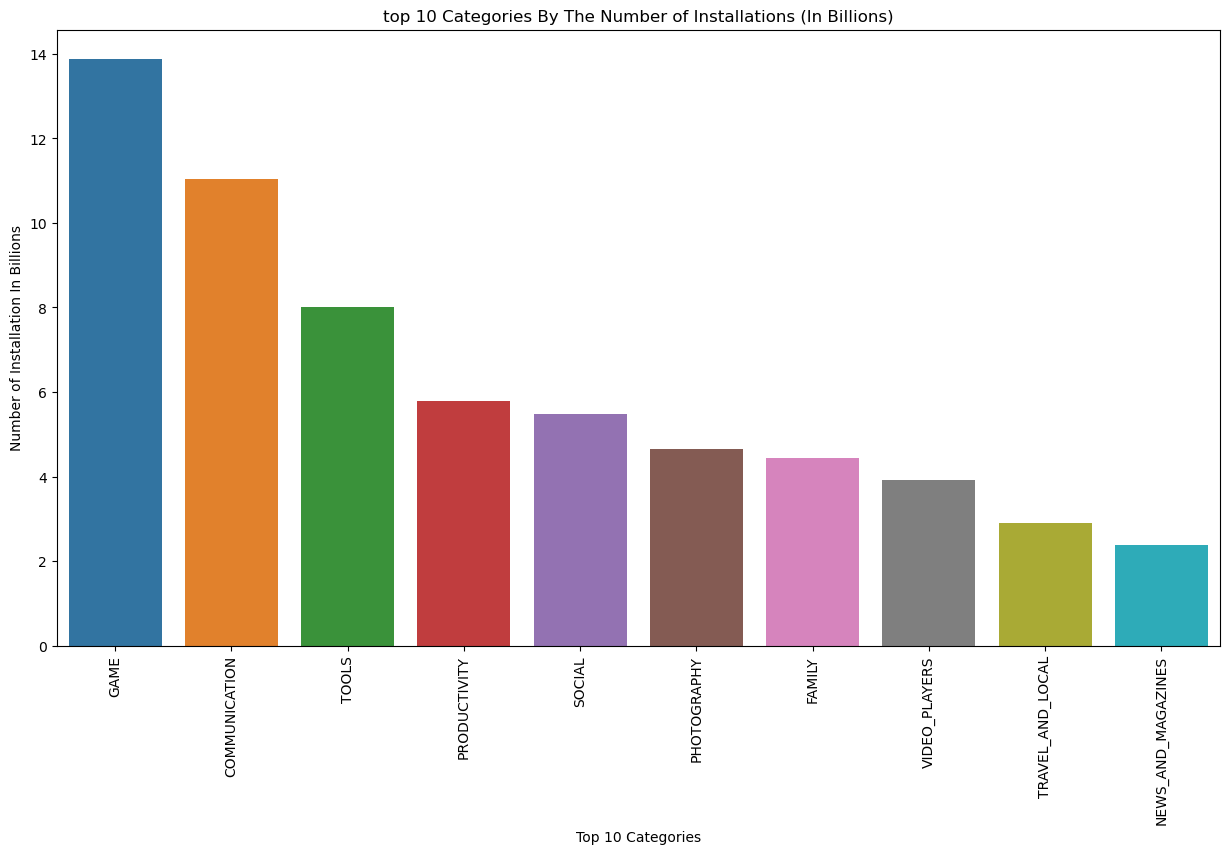

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_10_cat_installs, x='Category', y='Installs')
plt.title("top 10 Categories By The Number of Installations (In Billions)")
plt.xlabel("Top 10 Categories")
plt.ylabel("Number of Installation In Billions")
plt.xticks(rotation=90);

## Observations
- Top 10 categories by the number of installations are: GAME,COMMUNICATION, TOOLS, PRODUCTIVITY, SOCIAL, PHOTOGRAPHY, FAMILY, VIDEO_PLAYERS, TRAVEL_AND_LOCA, and NEWS_AND_MAGAZINE.
- The category with the most installation is Game with 13.87 billions of installations follow by Communication with around 11 billions of installations and Tools with around 8 billions of installtions.

## Top 5 Most Install Apps In Each Category

In [97]:
# Define the number of top apps to retrieve
top_apps_count = 5

# Create an empty DataFrame to store the top apps in each popular category
top_apps_by_category = pd.DataFrame(columns=['Category', 'App', 'Installs'])

# Iterate through popular categories
for category in cat_installs['Category'].head():
    # Filter the DataFrame to include only apps in the current category
    category_df = df2[df2['Category'] == category]
    
    # Sort apps by installations in descending order and select the top 5
    top_apps = category_df.sort_values(by='Installs', ascending=False).head(top_apps_count)
    
    # Append the top apps to the result DataFrame
    top_apps_by_category = pd.concat([top_apps_by_category, top_apps[['Category', 'App', 'Installs']]])

# Reset the index of the result DataFrame
top_apps_by_category.reset_index(drop=True, inplace=True)
top_apps_by_category['Installs'] = top_apps_by_category['Installs']/1000000000 # Divide by billion
top_apps_by_category

,Category,App,Installs
0,GAME,Subway Surfers,1.0
1,GAME,Candy Crush Saga,0.5
2,GAME,Temple Run 2,0.5
3,GAME,Pou,0.5
4,GAME,My Talking Tom,0.5
5,COMMUNICATION,Messenger – Text and Video Chat for Free,1.0
6,COMMUNICATION,Skype - free IM & video calls,1.0
7,COMMUNICATION,WhatsApp Messenger,1.0
8,COMMUNICATION,Google Chrome: Fast & Secure,1.0
9,COMMUNICATION,Gmail,1.0


In [100]:
top_5_games = top_apps_by_category[:5]
top_5_coms = top_apps_by_category[5:10]
top_5_tools = top_apps_by_category[10:15]
top_5_productivity = top_apps_by_category[15:20]
top_5_socials = top_apps_by_category[20:]
top_5_games

,Category,App,Installs
0,GAME,Subway Surfers,1.0
1,GAME,Candy Crush Saga,0.5
2,GAME,Temple Run 2,0.5
3,GAME,Pou,0.5
4,GAME,My Talking Tom,0.5


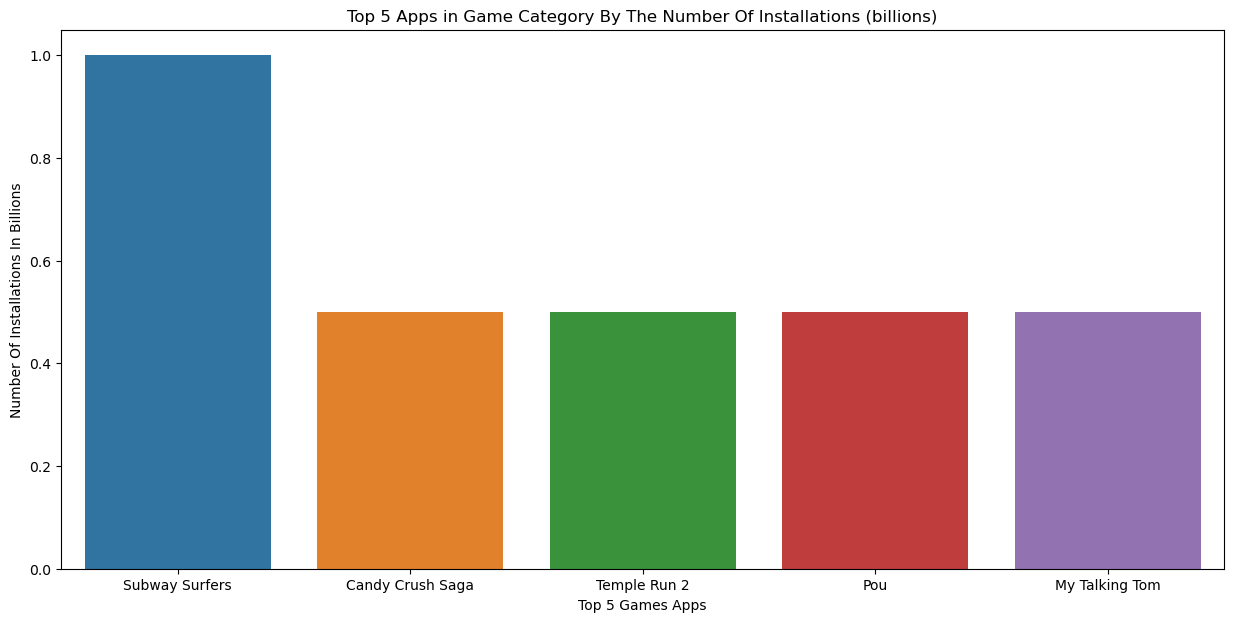

In [103]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_5_games, x='App', y='Installs')
plt.title("Top 5 Apps in Game Category By The Number Of Installations (billions)")
plt.xlabel("Top 5 Games Apps")
plt.ylabel("Number Of Installations In Billions");

## Observations
- Top 5 most installs apps are: Subway Surfers, Candy Crush Saga, Temple Run 2, Pou, and My Talking Tom
- Subway Surfres has over 1 billion installation while the rest of the 5 each have over half of billions of installations. 

In [101]:
top_5_coms

,Category,App,Installs
5,COMMUNICATION,Messenger – Text and Video Chat for Free,1.0
6,COMMUNICATION,Skype - free IM & video calls,1.0
7,COMMUNICATION,WhatsApp Messenger,1.0
8,COMMUNICATION,Google Chrome: Fast & Secure,1.0
9,COMMUNICATION,Gmail,1.0


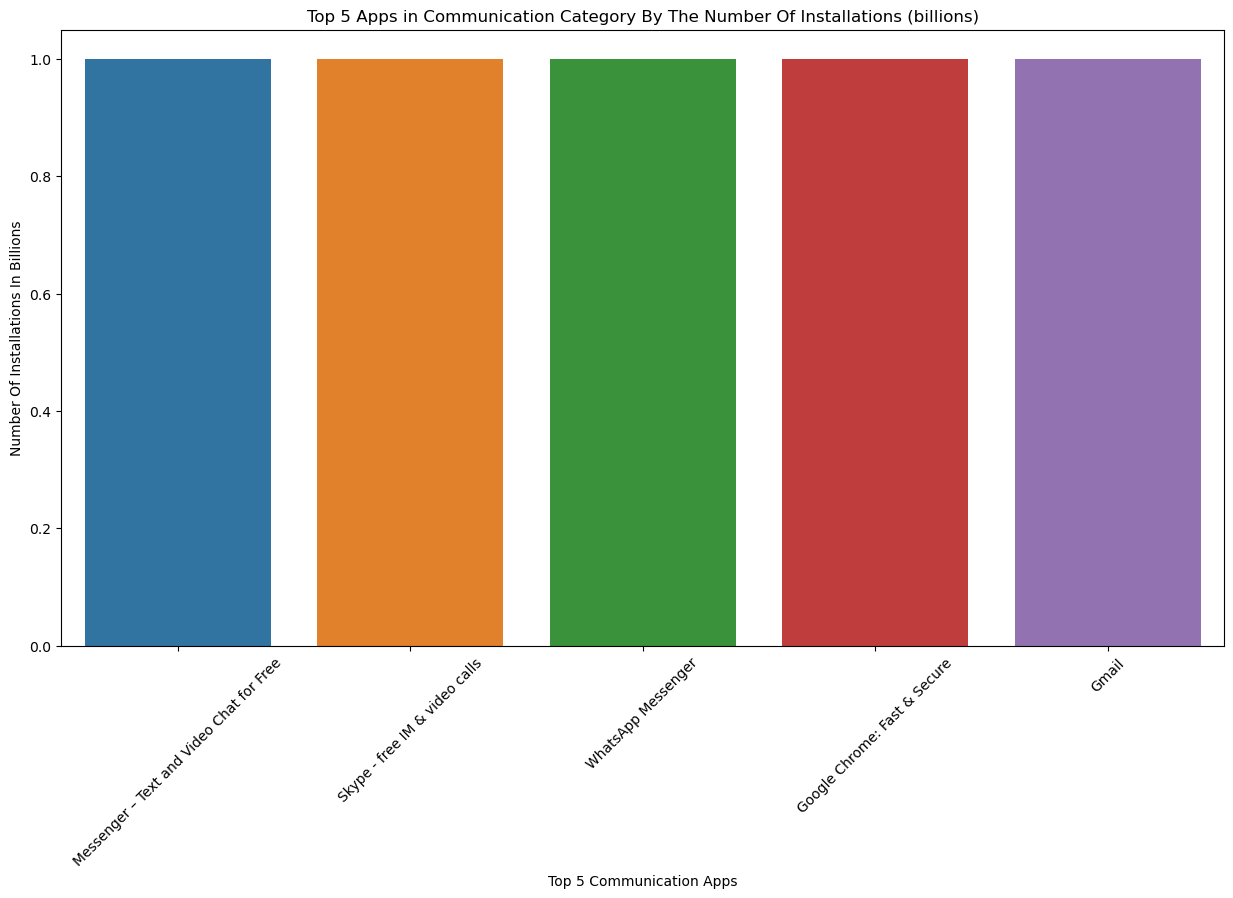

In [109]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_5_coms, x='App', y='Installs')
plt.title("Top 5 Apps in Communication Category By The Number Of Installations (billions)")
plt.xlabel("Top 5 Communication Apps")
plt.xticks(rotation=45)
plt.ylabel("Number Of Installations In Billions");

## Observations

- The top 5 most download app communication category are: Messenger, Skype, WhatsApp, Google Chrome: Fast & Secure, and Gmail.
- All of them have over 1 billion installation.

In [110]:
top_5_tools

,Category,App,Installs
10,TOOLS,Google,1.0
11,TOOLS,Google Translate,0.5
12,TOOLS,Clean Master- Space Cleaner & Antivirus,0.5
13,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",0.5
14,TOOLS,Gboard - the Google Keyboard,0.5


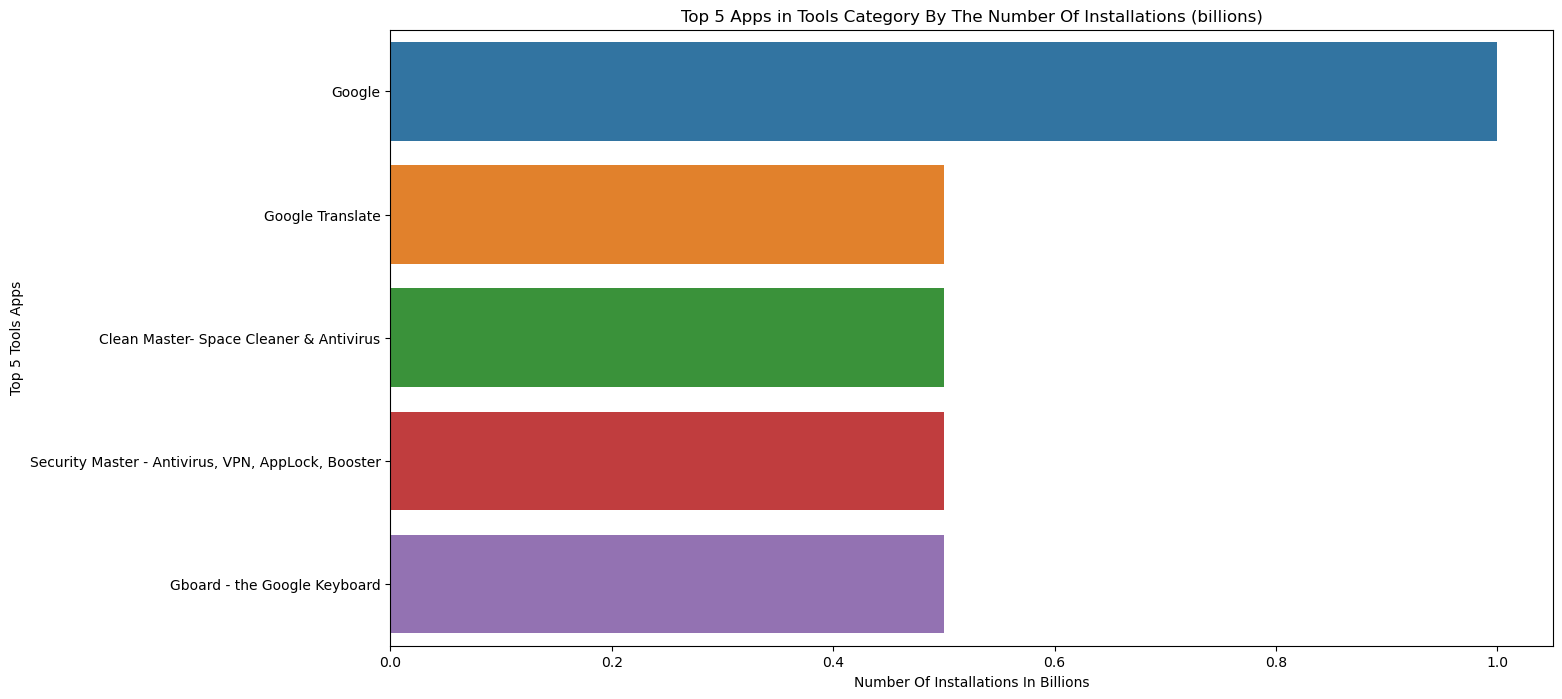

In [118]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_5_tools, y='App', x='Installs')
plt.title("Top 5 Apps in Tools Category By The Number Of Installations (billions)")
plt.ylabel("Top 5 Tools Apps")
#plt.xticks(rotation=85)
plt.xlabel("Number Of Installations In Billions");

## Observations

- The top 5 most download app Tools category are: Google, Google Translate, Clean Mater (Space Cleaner & Antivirus), Security Master (Antivirus, VPN, AppLock), and Gboard (Google keyboard)
- Beside Google app that has 1 billion installations, the rest have 0.5 billion installations each.

In [119]:
top_5_productivity

,Category,App,Installs
15,PRODUCTIVITY,Google Drive,1.0
16,PRODUCTIVITY,Microsoft Word,0.5
17,PRODUCTIVITY,Dropbox,0.5
18,PRODUCTIVITY,Cloud Print,0.5
19,PRODUCTIVITY,Google Calendar,0.5


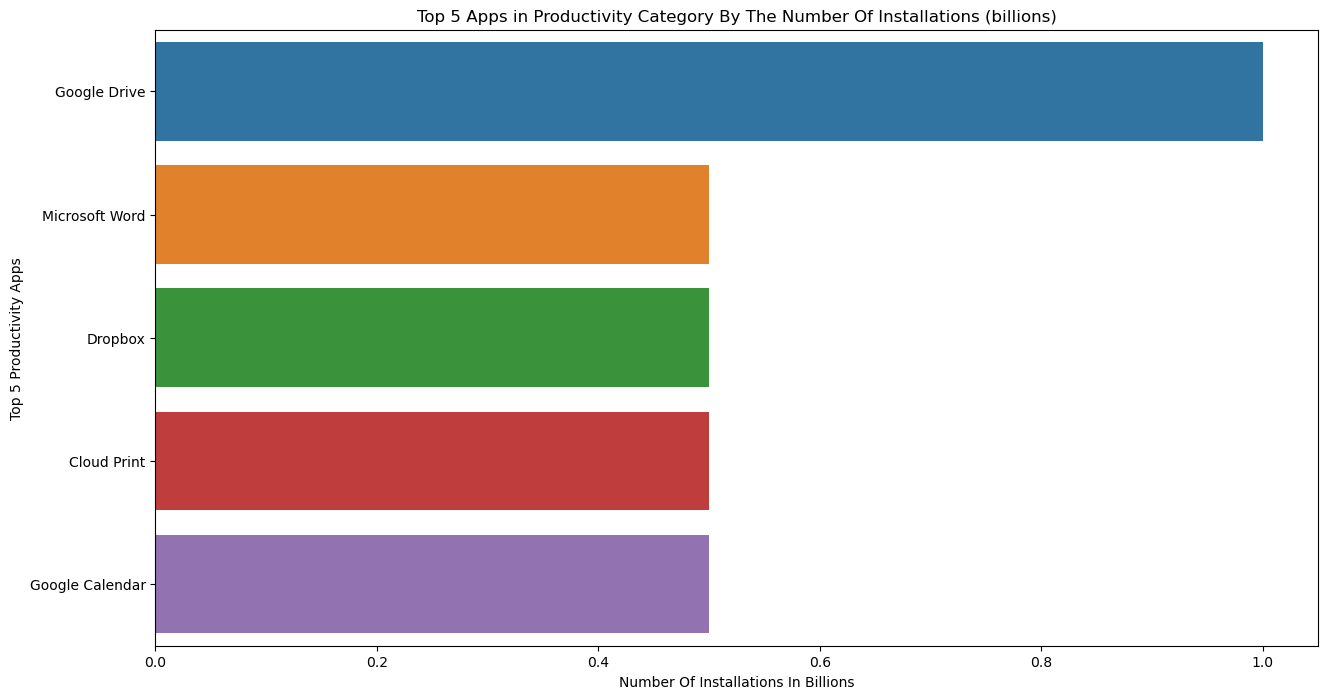

In [121]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_5_productivity, y='App', x='Installs')
plt.title("Top 5 Apps in Productivity Category By The Number Of Installations (billions)")
plt.ylabel("Top 5 Productivity Apps")
#plt.xticks(rotation=85)
plt.xlabel("Number Of Installations In Billions");

## Observations

- The top 5 most download app Tools category are: Google Drive, Microsoft Word, Dropbox, Cloud Print, and Google Calender.
- Beside Google Drive app that has 1 billion installations, the rest have 0.5 billion installations each.

In [120]:
top_5_socials

,Category,App,Installs
20,SOCIAL,Facebook,1.0
21,SOCIAL,Google+,1.0
22,SOCIAL,Instagram,1.0
23,SOCIAL,Facebook Lite,0.5
24,SOCIAL,Snapchat,0.5


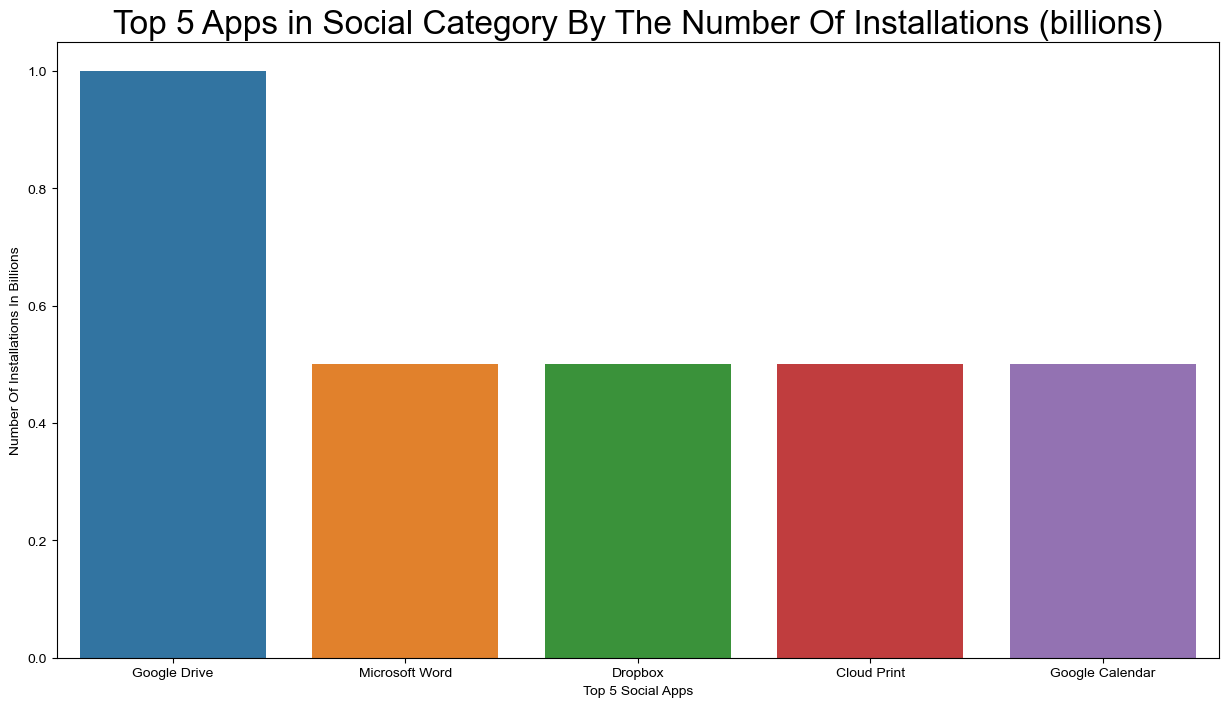

In [123]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_5_productivity, x='App', y='Installs')
sns.set_context("poster")
sns.set_style("darkgrid")
plt.title("Top 5 Apps in Social Category By The Number Of Installations (billions)")
plt.xlabel("Top 5 Social Apps")
plt.ylabel("Number Of Installations In Billions");

## Observations

- The top 5 most download app Tools category are: Facebook, Google+, Instagram, Facebook Lite, and Snapchat.
- Beside Facebook, Google+, and Instagram app that have 1 billion installations, the rest have 0.5 billion installations each.

##  How many apps with 5 ratings are there on Google Play Store 

In [132]:
rating = df2.groupby(by=['App', 'Category','Rating'])['Installs'].sum().sort_values(ascending=False).reset_index()
top_rating = rating[rating.Rating==5.0]
print("The number of apps with 5.0 ratings are: ",top_rating.shape[0])

The number of apps with 5.0 ratings are:  271


In [136]:
top_rating.head()

,App,Category,Rating,Installs
6290,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10000
6491,Oración CX,LIFESTYLE,5.0,5000
6543,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,5000
6694,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,5000
6889,GKPB FP Online Church,LIFESTYLE,5.0,1000


## Observations

- There are 271 apps with 5.0 rating on Google Playstore
- The app with 5.0 rating and the most install is 'Ek Bander Ne Kholi Dukan' from 'Family category'.